# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | playa blanca
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | piti village
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | siran
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | mansa
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | candolim
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | afaahiti
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | suomussalmi
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,playa blanca,28.8643,-13.8281,25.11,76,60,3.85,ES,1698597669
1,port-aux-francais,-49.3500,70.2167,1.87,98,100,8.95,TF,1698597669
2,piti village,13.4626,144.6933,28.03,89,0,2.57,GU,1698597670
3,edinburgh of the seven seas,-37.0676,-12.3116,11.16,66,21,11.45,SH,1698597672
4,qaqortoq,60.7167,-46.0333,3.97,63,100,3.95,GL,1698597672


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,playa blanca,28.8643,-13.8281,25.11,76,60,3.85,ES,1698597669
1,port-aux-francais,-49.3500,70.2167,1.87,98,100,8.95,TF,1698597669
2,piti village,13.4626,144.6933,28.03,89,0,2.57,GU,1698597670
3,edinburgh of the seven seas,-37.0676,-12.3116,11.16,66,21,11.45,SH,1698597672
4,qaqortoq,60.7167,-46.0333,3.97,63,100,3.95,GL,1698597672


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

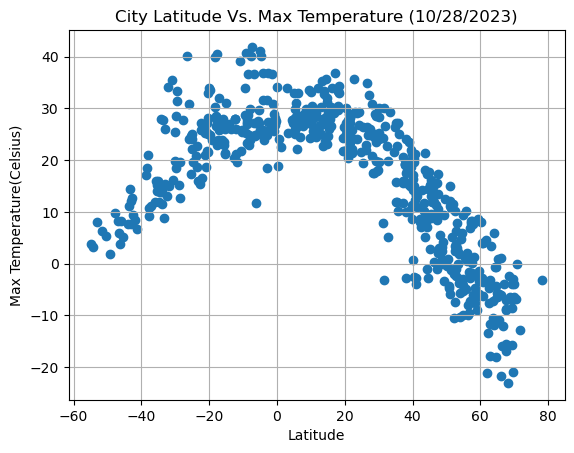

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (10/28/2023)")
plt.ylabel("Max Temperature(Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

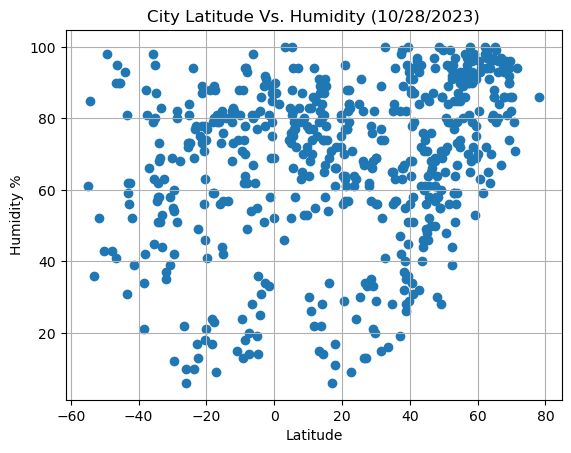

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (10/28/2023)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

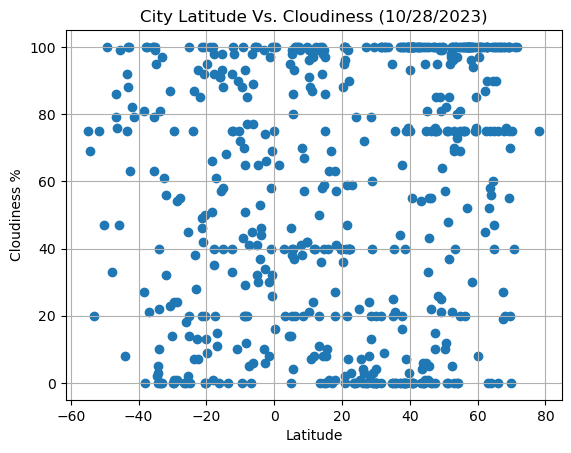

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (10/28/2023)")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

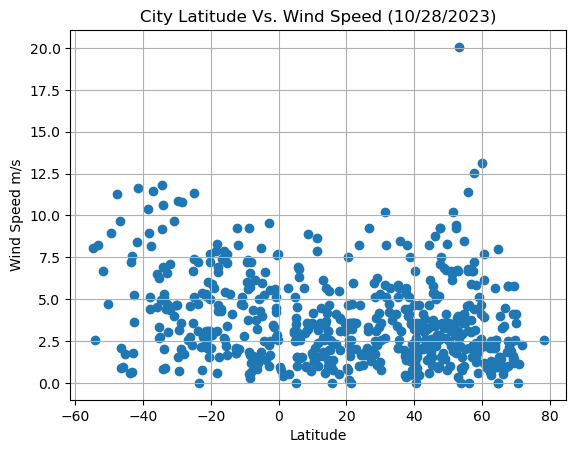

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (10/28/2023)")
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: -0.6025112659418735 


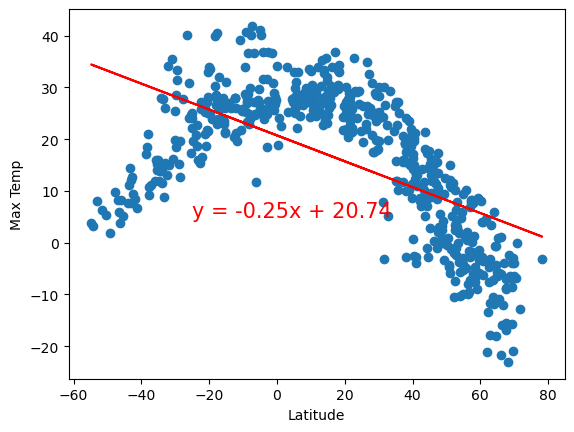

In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue} ")
plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,playa blanca,28.8643,-13.8281,25.11,76,60,3.85,ES,1698597669
2,piti village,13.4626,144.6933,28.03,89,0,2.57,GU,1698597670
4,qaqortoq,60.7167,-46.0333,3.97,63,100,3.95,GL,1698597672
5,lihue,21.9789,-159.3672,21.77,88,40,3.60,US,1698597415
6,siran,40.1894,39.1267,14.24,56,93,1.37,TR,1698597674


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,1.87,98,100,8.95,TF,1698597669
3,edinburgh of the seven seas,-37.0676,-12.3116,11.16,66,21,11.45,SH,1698597672
10,bredasdorp,-34.5322,20.0403,13.81,57,2,9.21,ZA,1698597678
11,hermanus,-34.4187,19.2345,14.52,62,0,11.82,ZA,1698597679
13,blackmans bay,-43.0167,147.3167,12.07,59,100,1.79,AU,1698597680


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8903245897800092 


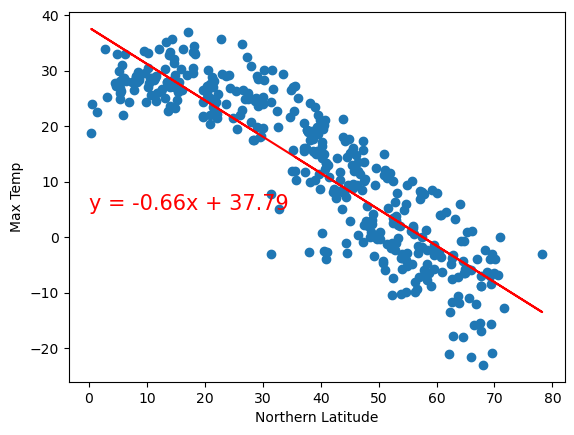

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel("Northern Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue} ")
plt.show()

The r-value is: 0.7364709160501896 


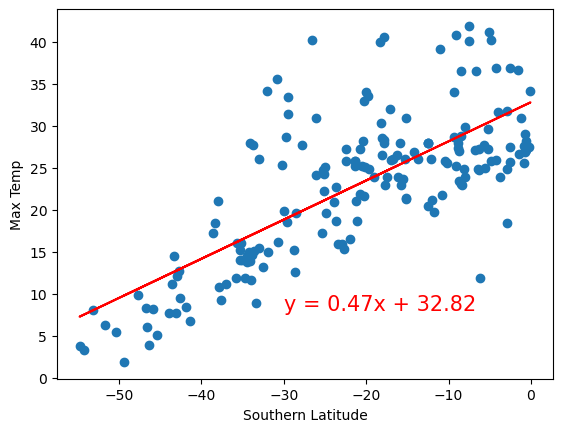

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,8),fontsize=15,color="red")
plt.xlabel("Southern Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue} ")
plt.show()

**Discussion about the linear relationship:** 

There is a strong negative correlation between latitude and max temperature in the northern hemisphere, which is supported by an r-value of -0.8903245897800092. In regards to the southern hemisphere, there is strong positive correlation between latitude and max temperature, with an r-value of 0.7364709160501896.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2765665256748719 


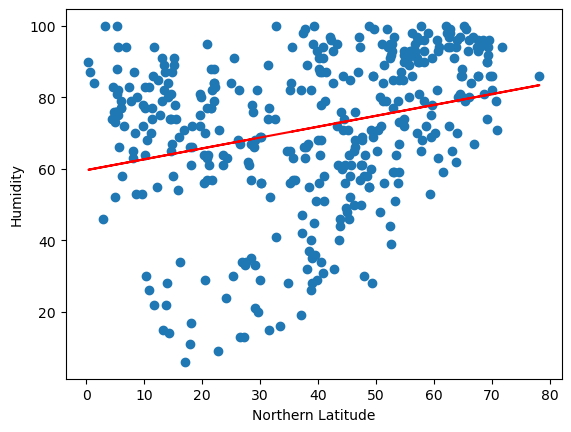

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Northern Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue} ")
plt.show()

The r-value is: 0.02787579108602123 


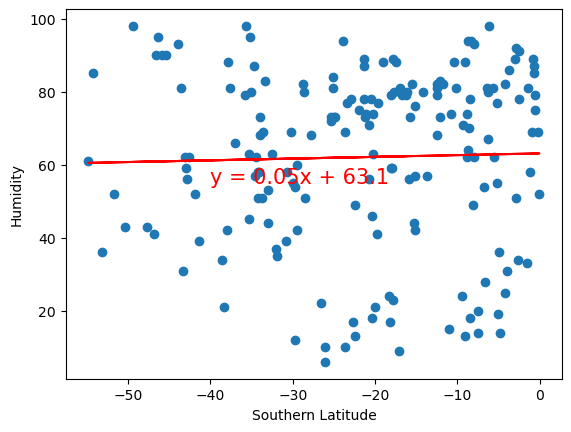

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,55),fontsize=15,color="red")
plt.xlabel("Southern Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue} ")
plt.show()

**Discussion about the linear relationship:** 

There is a weak positive correlation between latitude and humidity in both the northern and southern hemispheres, based on the respective r-values, 0.2765665256748719 and 0.02787579108602123.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2346081071693402 


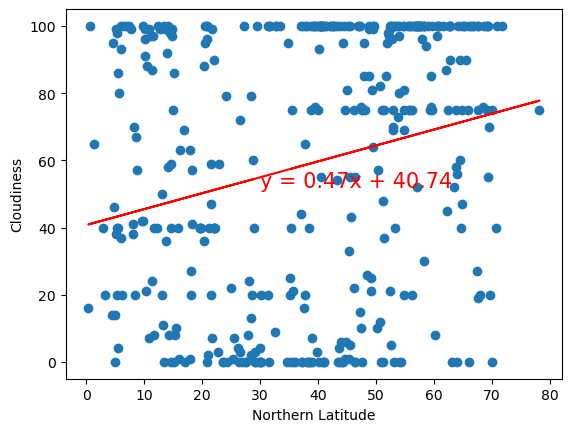

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,52),fontsize=15,color="red")
plt.xlabel("Northern Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue} ")
plt.show()

The r-value is: -0.02353265105323178 


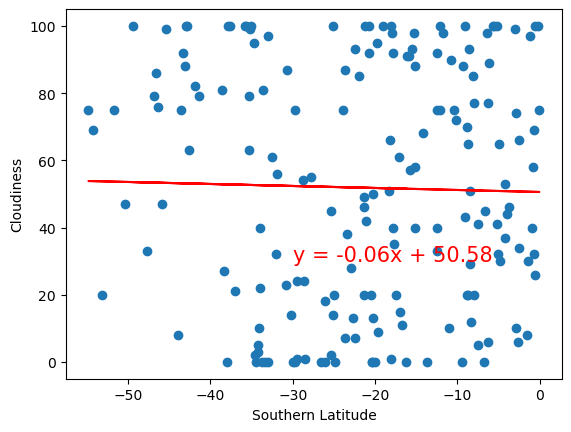

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel("Southern Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue} ")
plt.show()

**Discussion about the linear relationship:** 

There is a weak positive correlation between latitude and cloudiness in the northern hemisphere, based on the r-value of 0.2346081071693402. However, when we look at the r-value of for the southern hemisphere, -0.02353265105323178, there is a very weak negative correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05063607316622012 


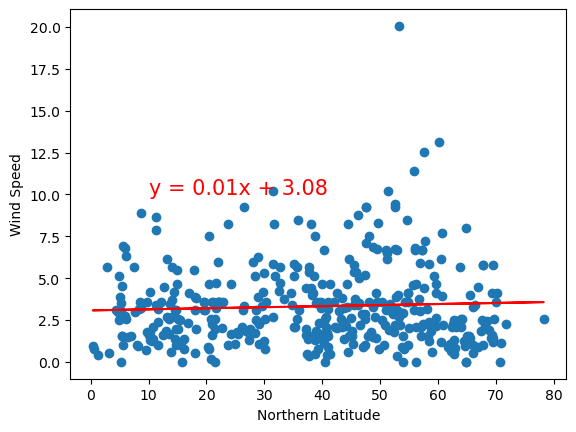

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel("Northern Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue} ")
plt.show()

The r-value is: -0.20609679076217144 


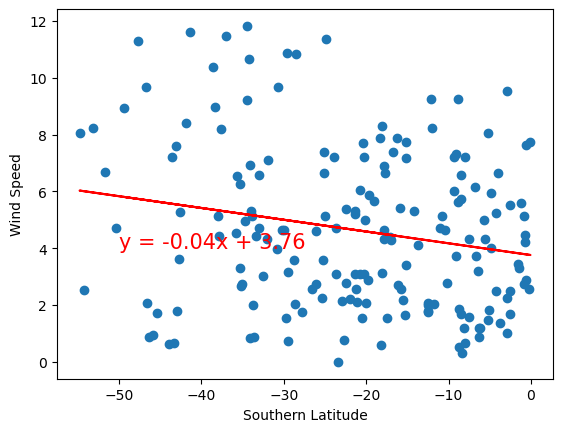

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,4),fontsize=15,color="red")
plt.xlabel("Southern Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue} ")
plt.show()

**Discussion about the linear relationship:** 

There is a very weak positive correlation between latitude and wind speed in the northern hemisphere, with an r-value of 0.05063607316622012. With an r-value of -0.20609679076217144, there is weak negative correlation between latitude and wind speed in the southern hemisphere.
